# Bernstein-Vazirani Algorithm

Briefly, the Bernstein-Vazirani algorithm allows us to determine a secret number stored inside a box. Mathematically, the problem statement that we are solving is the following:

Consider a hidden Boolean function "f" which takes in a string of "n" bits {x0,x1,.......,xn-1} and returns 1 for only a unique n-bit string s = {s0,s1,......sn-1} and 0 otherwise.

How many attempts do we need to make in order to find the secret number 
?

Now, we begin by writing down the secret number.

In [1]:
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
secret_number = '1101'

The algorithm requires "n+1" qubits and "n" classical bits, where "n" is the length of the secret number.

In [3]:
n = len(secret_number)

circuit = QuantumCircuit(n+1,n)

In [4]:
# Step 0

circuit.x(n) # the n+1 qubits are indexed 0...n, so the last qubit is index n

circuit.barrier() # just a visual aid for now

In [5]:
# Step 1

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

In [6]:
# Step 2

for ii, yesno in enumerate(reversed(secret_number)):
    if yesno == '1': 
        circuit.cx(ii, n)
    
circuit.barrier() # just a visual aid for now

In [7]:
# Step 3

circuit.h(range(n+1)) # range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits

circuit.barrier() # just a visual aid for now

circuit.measure(range(n), range(n)) # measure the qubits indexed from 0 to n-1 and store them 
                                    # into the classical bits indexed 0 to n-1

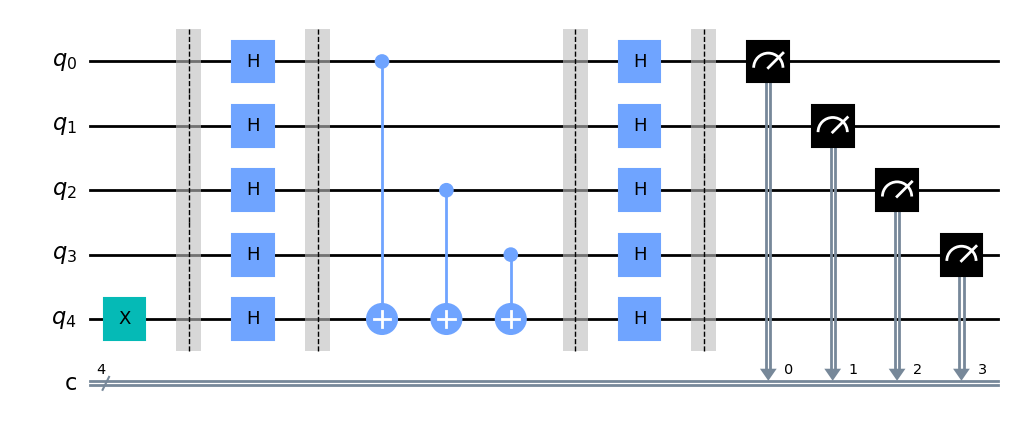

In [8]:
%matplotlib inline
circuit.draw(output='mpl')

# Stimulating in local computer

And finally, let's simulate the circuit on Aer's "qasm_simulator". We will set the number of shots to 1.

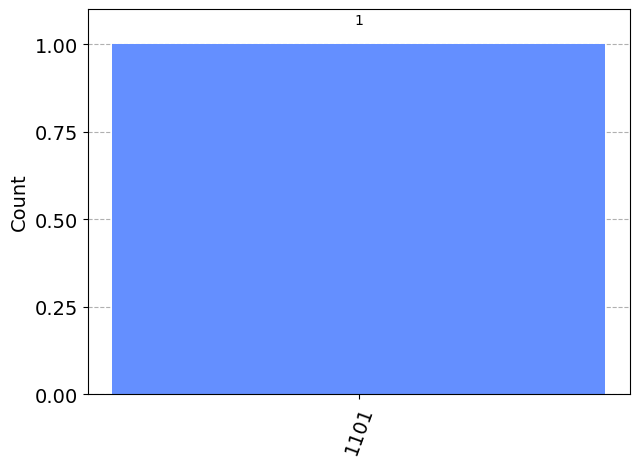

In [9]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1).result()
plot_histogram(result.get_counts(circuit))

In fact, setting the number of shots to 1000, we can still see that 100% of the results contain the secret number.

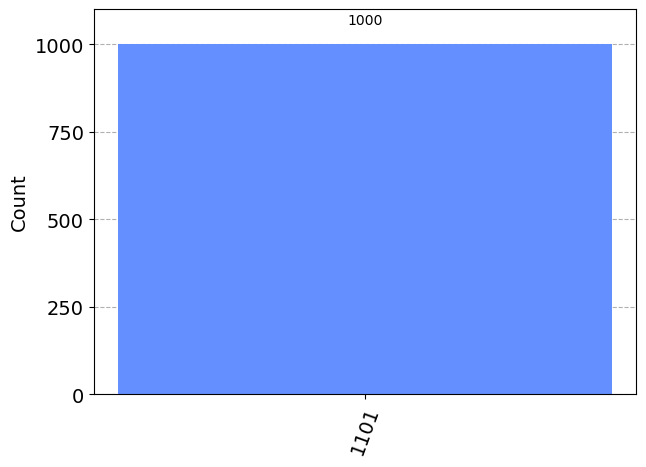

In [10]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend=simulator, shots=1000).result()
plot_histogram(result.get_counts(circuit))

# Stimulating using Quantum Computer

In [11]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
from qiskit.quantum_info import Operator
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

C:\Users\VIMAL\AppData\Local\Temp\ipykernel_8748\1761443290.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account()


least busy backend:  ibmq_manila


In [12]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend)
job = backend.run(transpiled_circuit, shots=shots)

job_monitor(job, interval=2)

Job Status: job has successfully run


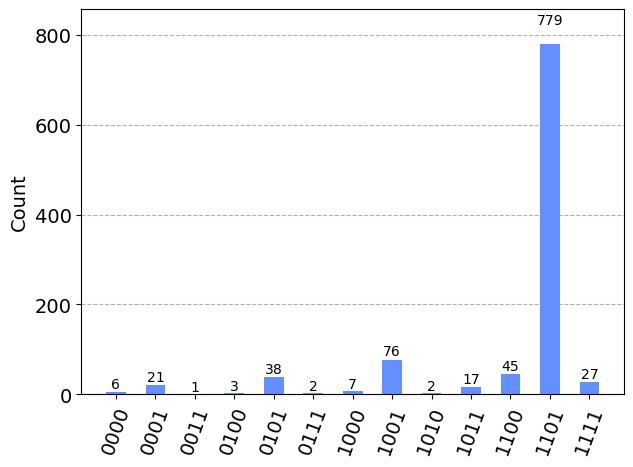

In [13]:
# Get the results from the computation
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

Here we can see as expected the output is 1101 and we get some error due to quantum computer.